In [1]:
#imports
from scipy.integrate import ode
import numpy as np
from matplotlib import pyplot as plt
from math import log
from scipy.integrate import odeint
from math import log

In [2]:
#Problem 1
def predator_prey(t, y, a, alpha, c, gamma):
    '''
    Parameters:
    --------------
    t: time variable.
    y: a tuple of length len(y0) representing current wolf and rabbit populations at time t.
    a, alpha, c, gamma: growth parameters. These are keyword arguments and can be of any length.
    Return:
    --------
    Return a tuple corresponding to the Predator-Prey model.
    '''
    r, w = y[0], y[1]
    drdt = r*(a - alpha*w)
    dwdt = w*(-c + gamma*r)
    return [drdt, dwdt]

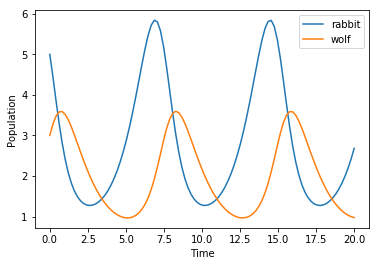

In [3]:
r0 = 5 # Initial rabbit population
w0 = 3 # Initial wolf population
# Define rabbit growth paramters
a = 1.0
alpha = 0.5
# Define wolf growth parameters
c = 0.75
gamma = 0.25
t_f = 20 # How long we want to run the model
y0 = [r0, w0]
# Initialize time and output arrays needed for the ode solver
t = np.linspace(0, t_f, 5*t_f)
y = np.zeros((len(t), len(y0)))
y[0,:] = y0

predator_prey_ode = lambda t, y:predator_prey(t, y, a, alpha, c, gamma)
p_p_solver = ode(predator_prey_ode).set_integrator('dopri5') # set the numerical integrator
p_p_solver.set_initial_value(y0, 0) # Set the initial value


for j in range(1, len(t)):
    y[j,:] = p_p_solver.integrate((t[j]))
    
    
plt.plot(t, y[:,0], label='rabbit')
plt.plot(t, y[:,1], label='wolf')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Population')
plt.show()

In [4]:
# Fixed Constants:
rho_F = 9400.
rho_L = 1800.
gamma_F = 3.2
gamma_L = 22.
eta_F = 180.
eta_L = 230.
C = 10.4 # Forbes constant
beta_AT = 0.14 # Adaptive Thermogenesis
beta_TEF = 0.1 # Thermic Effect of Feeding
K = 0

#Problem 2 help
EI_before = 2143
EI_after = 2025

PAL_before = 1.4
PAL_after = 1.5

#Calculate F0
height_in_inches = 68
height_in_meters = height_in_inches * 2.54 / 100 #2.54 cm/in

weight_in_pounds = 160
weight_in_kg = weight_in_pounds / 2.2 #2.2lb/kg

age = 38
sex = 'female'


def forbes(F):
    C1 = C * rho_L / rho_F
    return C1 / (C1 + F)


def energy_balance(F, L, EI, PAL):
    p = forbes(F)
    a1 = (1. / PAL - beta_AT) * EI - K - gamma_F * F - gamma_L * L
    a2 = (1 - p) * eta_F / rho_F + p * eta_L / rho_L + 1. / PAL
    return a1 / a2


def weight_odesystem(t, y, EI, PAL):
    F, L = y[0], y[1]
    p, EB = forbes(F), energy_balance(F, L, EI, PAL)
    return np.array([(1 - p) * EB / rho_F , p * EB / rho_L])

#Just to generate initial condition
def fat_mass(BW, age, H, sex):
    BMI = BW / H**2.
    if sex == 'male':
        return BW * (-103.91 + 37.31 * log(BMI) + 0.14 * age) / 100
    elif sex == 'female':
        return BW * (-102.01 + 39.96 * log(BMI) + 0.14 * age) / 100
    else:
        raise ValueError("Sex must be either 'male' or 'female'")
        
    
F0 = fat_mass(weight_in_kg, age, height_in_meters, sex)
#Calculate L0
L0 = weight_in_kg - F0

#y is 2-d vector of (f,l)
y0 = [F0, L0]

K = (1/PAL_before - beta_AT) * EI_before - gamma_F*F0 - gamma_L*L0

print(K)

53.602427507746825


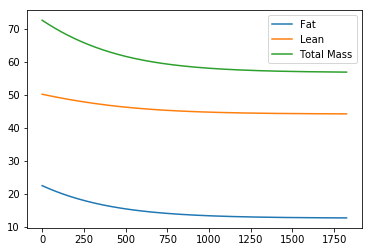

In [5]:
#Problem 2
weight_ode = lambda t, y: weight_odesystem(t, y, EI_after, PAL_after)
p_p_solver = ode(weight_ode).set_integrator('dopri5')

t0 = 0 #In days

p_p_solver.set_initial_value(y0, t0)
dt = 1 #We'll get her weight every day

#Initialize an array of (365*5,2) to fill
array_of_f_and_l = np.zeros((365*5,2)) # (5 years, every day) x (F,L)

for i in range(365*5):
    F, L = p_p_solver.integrate(p_p_solver.t+dt)
    array_of_f_and_l[i] = [F,L]
        

plt.plot(array_of_f_and_l[:,0], label='Fat')
plt.plot(array_of_f_and_l[:,1], label='Lean')
plt.plot(array_of_f_and_l[:,0]+array_of_f_and_l[:,1], label='Total Mass')
plt.legend()
plt.show()

//anaconda/envs/py36/lib/python3.6/site-packages/scipy/integrate/_ode.py:1035: UserWarning: dopri5: step size becomes too small
  self.messages.get(idid, 'Unexpected idid=%s' % idid))


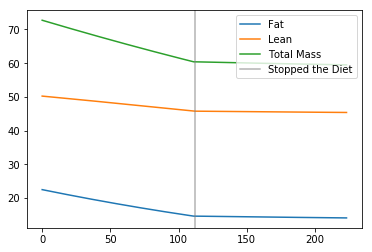

In [6]:
#Problem 3
first_EI, first_PAL = 1600, 1.7
first_weight_ode = lambda t, y: weight_odesystem(t, y, first_EI, first_PAL)
new_p_p_solver = ode(first_weight_ode).set_integrator('dopri5')
y0 = [F0, L0] #From before
t0 = 0 #In days

tot_days = 16*7

t = np.linspace(0, 16*7, 16*7)

new_p_p_solver.set_initial_value(y0, 0)
dt = 1 #We'll get her weight every day

#Initialize an array of (365*5,2) to fill
array_of_f_and_l = np.zeros((tot_days,2)) # (5 years, every day) x (F,L)

for i in range(len(t)):
    F, L = new_p_p_solver.integrate(t[i])
    array_of_f_and_l[i] = [F,L]
    

second_EI, second_PAL = 2025, 1.5
second_weight_ode = lambda t, y: weight_odesystem(t, y, second_EI, second_PAL)
second_p_p_solver = ode(second_weight_ode).set_integrator('dopri5')
y0 = [F0, L0] #From before
t0 = 0 #In days

tot_days = 16*7

t = np.linspace(0, 16*7, 16*7)

 

second_p_p_solver.set_initial_value(array_of_f_and_l[-1], 0)
dt = 1 #We'll get her weight every day

#Initialize an array of (365*5,2) to fill
second_array_of_f_and_l = np.zeros((tot_days,2)) # (5 years, every day) x (F,L)

for i in range(len(t)):
    F, L = second_p_p_solver.integrate(t[i])
    second_array_of_f_and_l[i] = [F,L]
        

total_array = np.vstack((array_of_f_and_l, second_array_of_f_and_l))    

plt.plot(total_array[:,0], label='Fat')
plt.plot(total_array[:,1], label='Lean')
plt.plot(total_array[:,0] + total_array[:,1], label='Total Mass')
plt.axvline(x=tot_days, color='gray', alpha=.6, label='Stopped the Diet')
plt.legend()
plt.show()

In [7]:
#Problems 4, 5
y0 = np.array([1 / 2., 1 / 3.]) # initial conditions
def plot_it(y0):
    a, b = 0., 13. # (Nondimensional) Time interval for one 'period'
    alpha = 1. / 3 # Nondimensional parameter
    dim = 2 
    
    # used in the built in IVP solver.
    def Lotka_Volterra(y, x):
        return np.array([y[0] * (1. - y[1]), alpha * y[1] * (y[0] - 1.)])
    subintervals = 200
    # Using the built in ode solver
    Y = odeint(Lotka_Volterra, y0, np.linspace(a, b, subintervals))
    # Plot the direction field
    Y1, Y2 = np.meshgrid(np.arange(0, 4.5, .2), np.arange(0, 4.5, .2), sparse=True,copy=False)
    U, V = Lotka_Volterra((Y1, Y2), 0)
    Q = plt.quiver(Y1[::3, ::3], Y2[::3, ::3], U[::3, ::3], V[::3, ::3], pivot='mid', color='b', units='dots',width=3.)
    # Plot the 2 Equilibrium points
    plt.plot(1, 1, 'ok', markersize=8)
    plt.plot(0, 0, 'ok', markersize=8)
    # Plot the solution in phase space
    plt.plot(Y[:,0], Y[:,1], '-k', linewidth=2.0)
    plt.plot(Y[::10,0], Y[::10,1], '*b')
    plt.axis([-.5, 4.5, -.5, 4.5])
    plt.title("Phase Portrait of the Lotka-Volterra Predator-Prey Model")
    plt.xlabel('Prey',fontsize=15)
    plt.ylabel('Predators',fontsize=15)


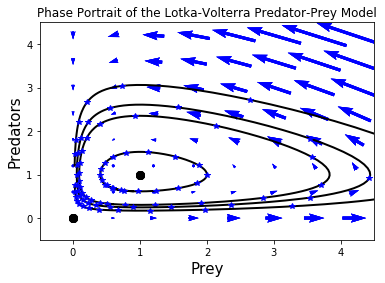

In [8]:
#Prob 4
this_alpha = 1. / 3 # Nondimensional parameter
this_beta = 100
for i in [y0, np.array([1/2, 3/4]), np.array([1/16,3/4]), np.array([1/40,3/4])]:
    plot_it(i)
plt.show()

In [9]:
#Prob 5
def plot5(y0, alpha, beta):
    a, b = 0., 13. # (Nondimensional) Time interval for one 'period'
    dim = 2 
    
    # used in the built in IVP solver.
    def Logistic(y, x):
        return np.array([y[0] * (1. - y[0] - y[1]), alpha * y[1] * (y[0] - beta)])
    
    subintervals = 200
    # Using the built in ode solver
    Y = odeint(Logistic, y0, np.linspace(a, b, subintervals))
    # Plot the direction field
    Y1, Y2 = np.meshgrid(np.arange(0, 4.5, .2), np.arange(0, 4.5, .2), sparse=True,copy=False)
    U, V = Logistic((Y1, Y2), 0)
    Q = plt.quiver(Y1[::3, ::3], Y2[::3, ::3], U[::3, ::3], V[::3, ::3], pivot='mid', color='b', units='dots',width=3.)
    # Plot the 2 Equilibrium points
    plt.plot(1, 0, 'ok', markersize=8)
    plt.plot(0, 0, 'ok', markersize=8)
    plt.plot(beta, 1-beta, 'ok', markersize=8)
    # Plot the solution in phase space
    plt.plot(Y[:,0], Y[:,1], '-k', linewidth=2.0)
    plt.plot(Y[::10,0], Y[::10,1], '*b')
    plt.axis([-.5, 4.5, -.5, 4.5])
    plt.title("Phase Portrait of the Logistic Predator-Prey Model")
    plt.xlabel('Prey',fontsize=15)
    plt.ylabel('Predators',fontsize=15)

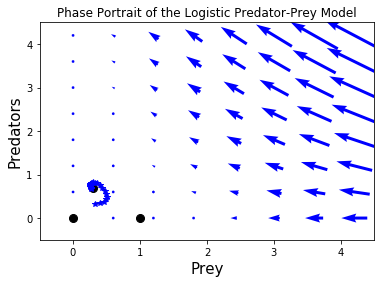

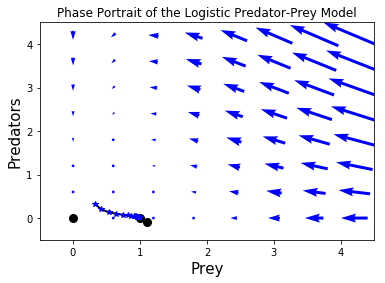

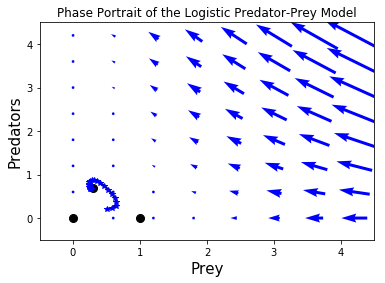

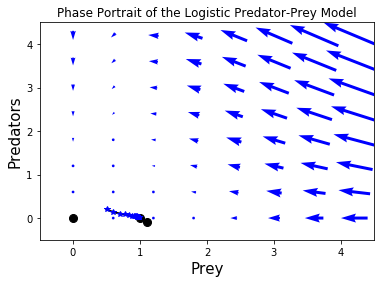

In [10]:
for y0 in [np.array([1/3,1/3]), np.array([1/2,1/5])]:
    for alpha, beta in [(1,0.3), (1,1.1)]:
        plot5(y0, alpha, beta)
        
        plt.show()